In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score

In [2]:
real_estate_data = pd.read_csv("../input/real-estate-price-prediction/Real estate.csv")
real_estate_data.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


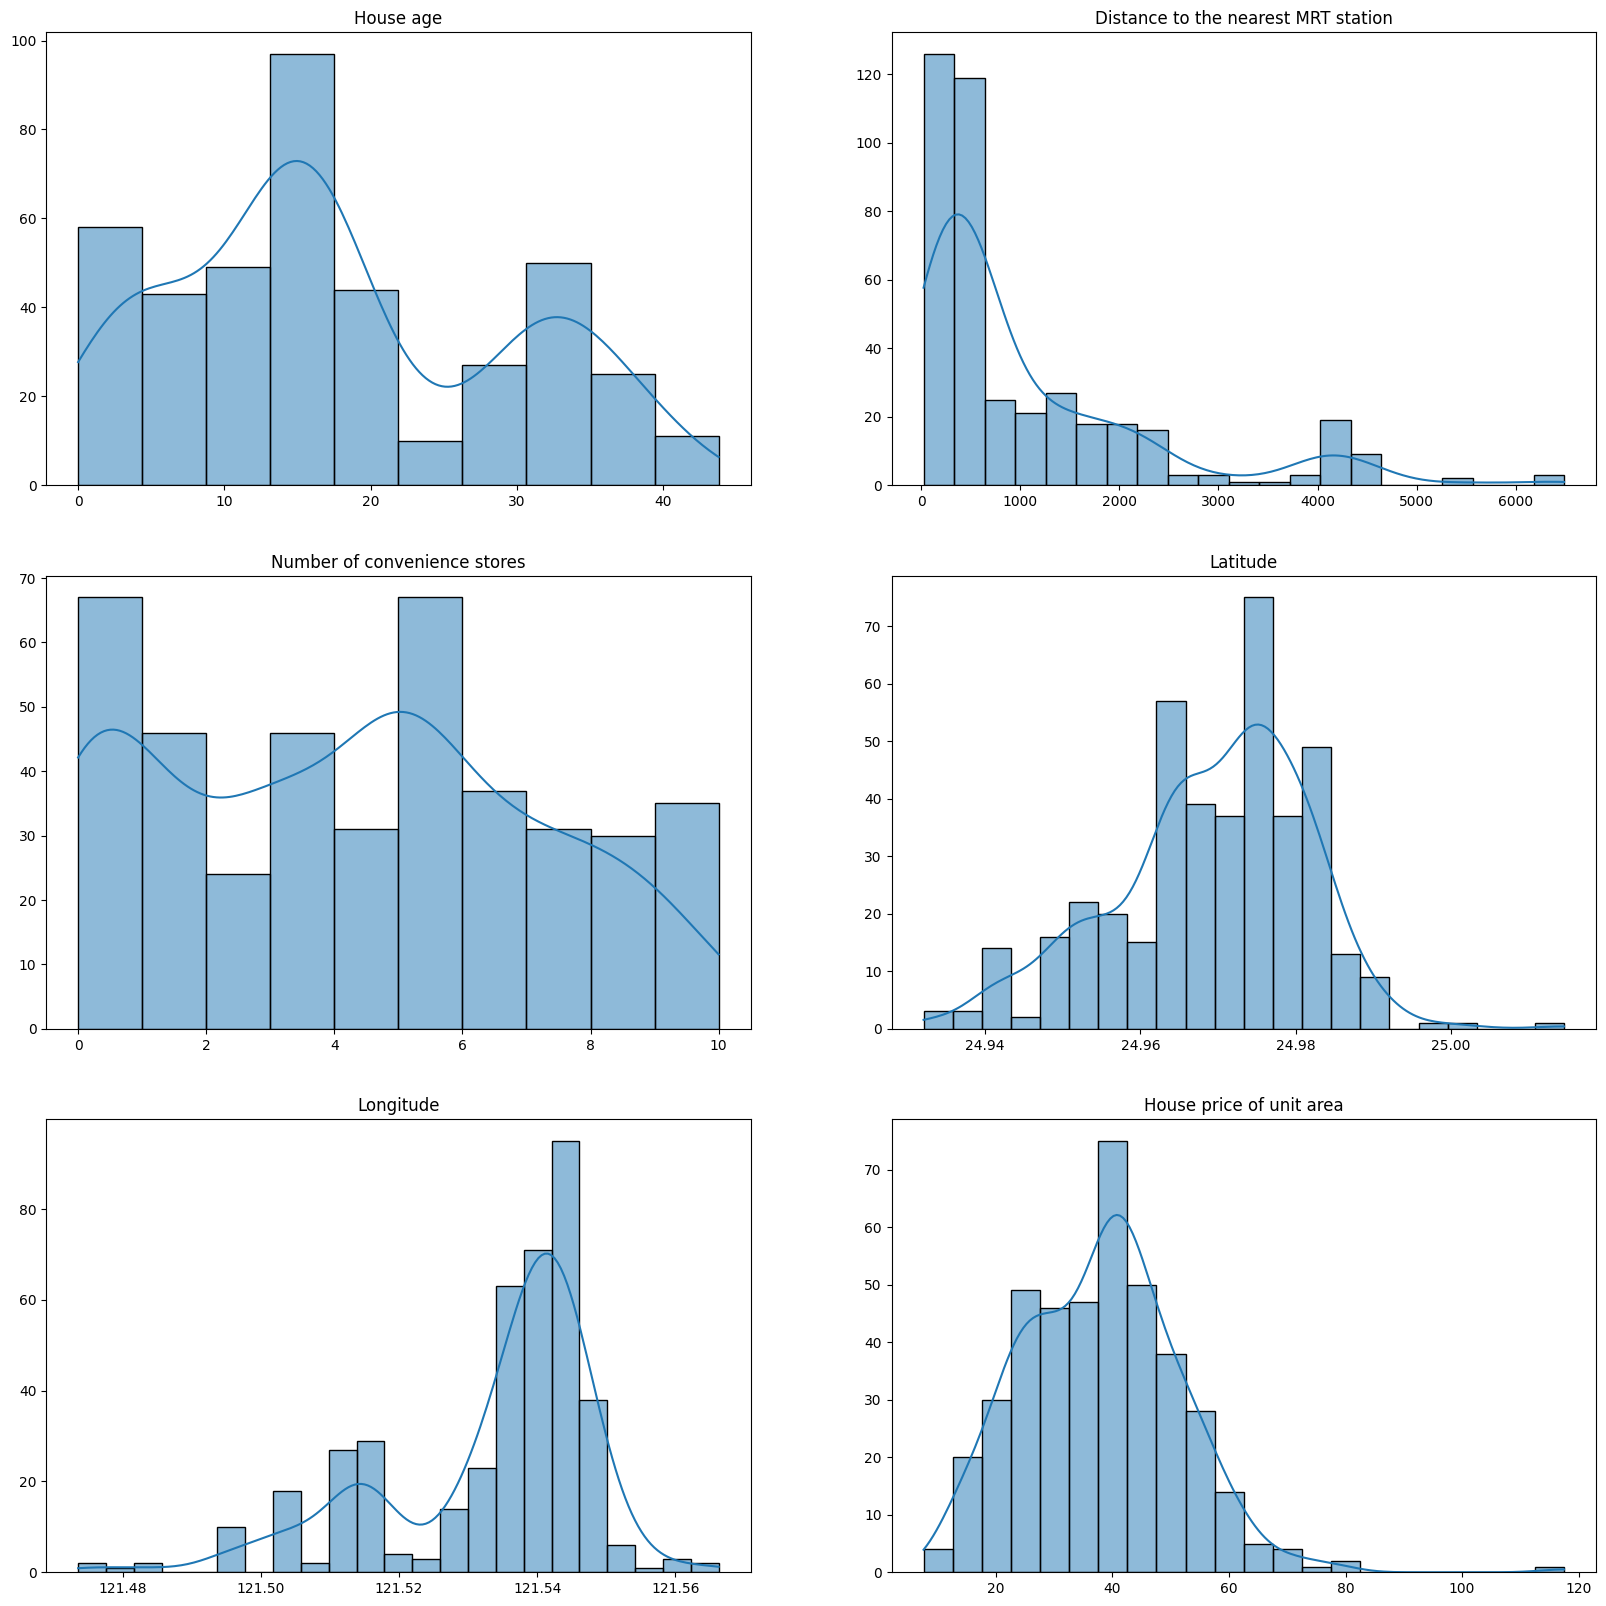

In [3]:
real_estate_data.rename(columns = {'X1 transaction date' : 'Transaction date', 
                                   'X2 house age' : 'House age',
                                   'X3 distance to the nearest MRT station' : 'Distance to the nearest MRT station',
                                   'X4 number of convenience stores' : 'Number of convenience stores',
                                   'X5 latitude' : 'Latitude',
                                   'X6 longitude' : 'Longitude',
                                   'Y house price of unit area' : 'House price of unit area'}, inplace = True) 

fig, axes = plt.subplots(nrows = 3, ncols = 2, figsize = (20, 20))
cols = ['House age', 'Distance to the nearest MRT station', 'Number of convenience stores',
        'Latitude', 'Longitude', 'House price of unit area']

for i, col in enumerate(cols):
    sns.histplot(real_estate_data[col], kde=True, ax=axes[i//2, i%2])
    axes[i//2, i%2].set_title(col)
    axes[i//2, i%2].set_xlabel('')
    axes[i//2, i%2].set_ylabel('')

plt.show()

In [4]:
real_estate_predictors = ['Distance to the nearest MRT station', 
                          'Number of convenience stores', 
                          'Latitude', 
                          'Longitude']

real_estate_predictors = real_estate_data[real_estate_predictors]
real_estate_prices = real_estate_data['House price of unit area']

real_estate_predictors_train, real_estate_predictors_test, real_estate_prices_train, real_estate_prices_test = train_test_split(real_estate_predictors, real_estate_prices, test_size = 0.2, random_state = 50)

real_estate_price_prediction_model = LinearRegression()
real_estate_price_prediction_model.fit(real_estate_predictors_train, real_estate_prices_train)
real_estate_predictions = real_estate_price_prediction_model.predict(real_estate_predictors_test)

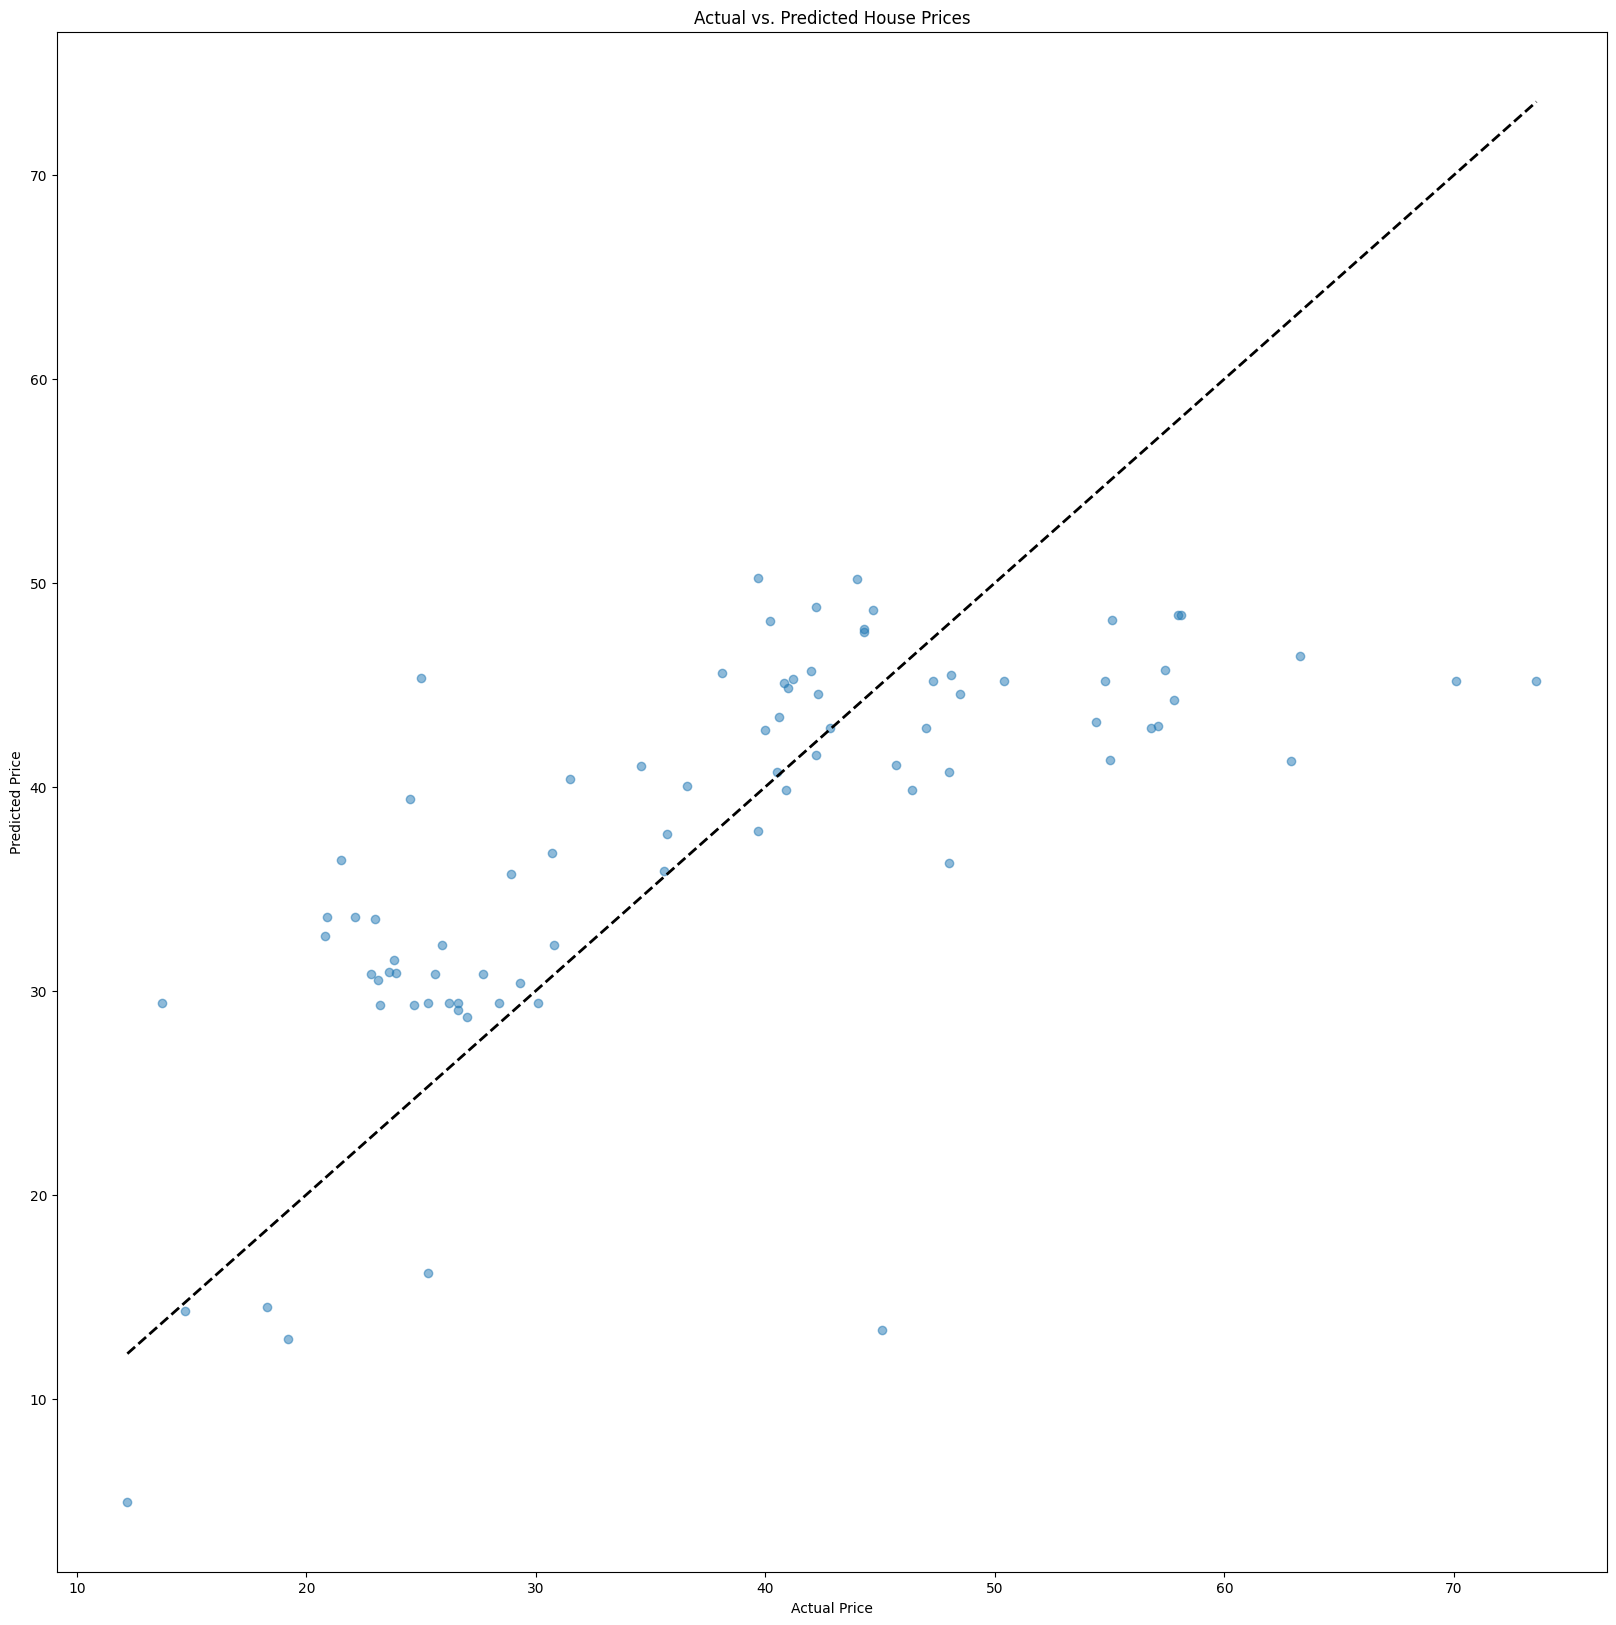

In [5]:
plt.figure(figsize=(20, 20))
plt.scatter(real_estate_prices_test, real_estate_predictions, alpha=0.5)
plt.plot([real_estate_prices_test.min(), real_estate_prices_test.max()], [real_estate_prices_test.min(), real_estate_prices_test.max()], 'k--', lw=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs. Predicted House Prices')
plt.show()